In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import sklearn as sk
import numpy as np

1.) Import the data from CCLE into a new Google Colab file

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
data = pd.read_csv("/content/gdrive/MyDrive/ECON441B/insurance.csv")

In [4]:
data


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
data.loc[data["sex"] == "female","sex"] = 1.
data.loc[data["sex"] == "male","sex"] = 0.
data.loc[data["smoker"] == "yes","smoker"] = 1.
data.loc[data["smoker"] == "no","smoker"] = 0.

data.loc[data["region"]=="southwest","southwest"]=1
data.loc[data["region"]!="southwest","southwest"]=0
data.loc[data["region"]=="northwest","northwest"]=1
data.loc[data["region"]!="northwest","northwest"]=0
data.loc[data["region"]=="southeast","southeast"]=1
data.loc[data["region"]!="southeast","southeast"]=0
data.loc[data["region"]=="northeast","northeast"]=1
data.loc[data["region"]!="northeast","northeast"]=0

In [7]:
data.head()

,age,sex,bmi,children,smoker,region,charges,southwest,northwest,southeast,northeast
0,19,1.0,27.900,0,1.0,southwest,16884.92400,1.0,0.0,0.0,0.0
1,18,0.0,33.770,1,0.0,southeast,1725.55230,0.0,0.0,1.0,0.0
2,28,0.0,33.000,3,0.0,southeast,4449.46200,0.0,0.0,1.0,0.0
3,33,0.0,22.705,0,0.0,northwest,21984.47061,0.0,1.0,0.0,0.0
4,32,0.0,28.880,0,0.0,northwest,3866.85520,0.0,1.0,0.0,0.0


In [8]:
sub = data[["age","sex","bmi","children","smoker","southwest","northwest","southeast","northeast"]]
data1 = np.array(sub)
target = np.array(data.iloc[:,-5:-4])


2.) Split the data into 80/20, in/out sample

In [9]:
cut = int((len(data1) * .8) //1)

In [10]:
in_data = data1[:cut]
out_data = data1[cut:]
in_target = target[:cut]
out_target = target[cut:]

3.) Normalize the Data

In [11]:
from sklearn import preprocessing

In [12]:
scaler = preprocessing.StandardScaler().fit(in_data)
in_data_scale = scaler.transform(in_data)
out_data_scale = scaler.transform(out_data)

In [13]:
in_data_scale

array([[-1.45390122,  1.02077653, -0.47403991, ..., -0.55791981,
        -0.6155209 , -0.56943606],
       [-1.52464584, -0.97964634,  0.4911621 , ..., -0.55791981,
         1.6246402 , -0.56943606],
       [-0.81719959, -0.97964634,  0.36455128, ..., -0.55791981,
         1.6246402 , -0.56943606],
       ...,
       [-0.03900872, -0.97964634,  1.95211949, ..., -0.55791981,
        -0.6155209 ,  1.75612342],
       [ 1.65886228, -0.97964634, -1.50008089, ...,  1.79237229,
        -0.6155209 , -0.56943606],
       [ 1.02216066,  1.02077653,  0.18367867, ..., -0.55791981,
         1.6246402 , -0.56943606]])

4.) Get lambda from Lasso cross validation

In [14]:
from sklearn.linear_model import LassoCV

In [15]:
modCV = LassoCV().fit(in_data_scale, in_target)
a = modCV.alpha_
a

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


176.27926602952408

In [17]:
from sklearn.linear_model import Lasso

5.) Run a lasso regression with that Lambda

In [18]:
model1=Lasso().fit(in_data_scale,in_target)
model1.predict(np.array(in_data_scale))
model1.coef_

array([3667.20423826,  125.73841384, 2061.49452173,  522.2952774 ,
       9476.74749186, -330.71024809,    0.        , -287.31196953,
        202.71265811])

6.) Visualize the coefficients

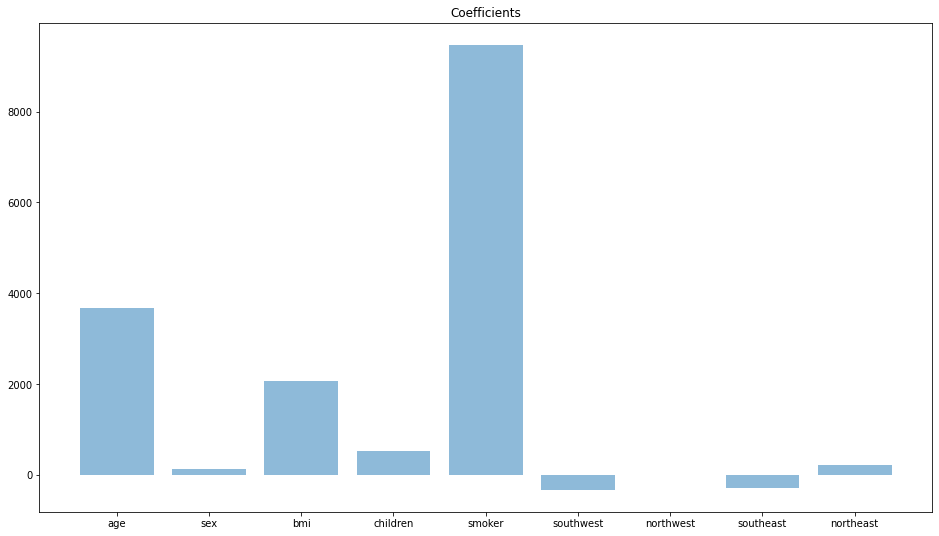

In [22]:
objects = ('age', 'sex', 'bmi','children','smoker','southwest','northwest','southeast','northeast')
y_pos = range(len(objects))
plt.figure(figsize=(16, 9))
plt.bar(y_pos, model1.coef_, align='center', alpha=0.5)
plt.xticks(y_pos,objects)
plt.title('Coefficients')
plt.show()

7.) Interpret the coefficients

Age is one of the significant effect that will influce people to buy health insurance, especially the elders tend to spend more. Also, bmi is a significant factor, higher bmi tend to spend more on health insurance. In addition, family with children will spend more on health insurance compare to thouse without kids. Moreover, regional difference need to be take into consideration, people in the northwest region tends to spend more on health insurance. Somking is the biggest factor that drive people to buy health insurance since smokers have more health problems than those who don't smoke.

8.) Compare in and out of sample MSE’s

In [23]:
in_y_pred=model1.predict(np.array(in_data_scale))
out_y_pred=model1.predict(np.array(out_data_scale))
from sklearn.metrics import mean_squared_error
out_sample_mse = mean_squared_error(out_y_pred,out_target)
in_sample_mse=mean_squared_error(in_y_pred,in_target)

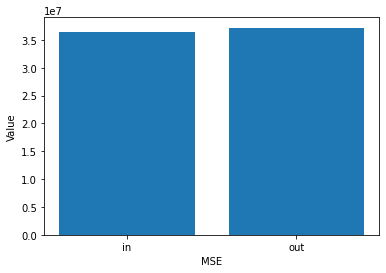

In [24]:
plt.bar(["in","out"],[in_sample_mse,out_sample_mse])
plt.xlabel("MSE")
plt.ylabel("Value")
plt.show()